### CS166 Pre-Class Work for Session 2.2

## Implementing Cellular Automata

_Yoav Rabinovich, Jan 2019_

--------------------------------------

**Sayama Exercise 11.3**:

Modify Code 11.5 to implement a simulator of the Game of Life
CA. Simulate the dynamics from a random initial configuration. Measure the density
of state 1’s in the configuration at each time step, and plot how the density
changes over time. This can be done by creating an empty list in the initialize
function, and then making the measurement and appending the result to the list in
the observe function. The results stored in the list can be plotted manually after the
simulation, or they could be plotted next to the visualization using pylab’s subplot
function during the simulation.

In [0]:
import matplotlib
matplotlib.use('TkAgg')
from pylab import *

n = 100 # size of space: n x n
p = 0.4 # probability of initial activation

def initialize():
    global config, nextconfig, density
    config = zeros([n, n])
    density=[]
    for x in range(n):
        for y in range(n):
            config[x, y] = 1 if random() < p else 0
    nextconfig = zeros([n, n])
    
def observe():
    global config, nextconfig, density
    cla()
    matplotlib.pyplot.subplot(1,2,1)
    imshow(config, vmin = 0, vmax = 1, cmap = cm.binary)
    matplotlib.pyplot.subplot(1,2,2)
    density.append(sum(sum(density))/n**2)
    if len(density)!=0:
        matplotlib.pyplot.plot(range(len(density)),density)

def update():
    global config, nextconfig, density
    for x in range(n):
        for y in range(n):
            count = 0
            for dx in [-1, 0, 1]:
                for dy in [-1, 0, 1]:
                    count += config[(x + dx) % n, (y + dy) % n]
            if config[x,y]==1:
                nextconfig[x, y] = 1 if 3<=count<=4 else 0
            else:
                nextconfig[x,y] = 1 if count==3 else 0
    config, nextconfig = nextconfig, config

**Sayama Exercise 11.5**:

Implement an interactive parameter setter for p in Code 11.5. Then
conduct systematic simulations with varying p, and identify its critical value below
which isolated clusters are formed but above which the whole space is filled with
panic.

In [0]:
n = 100 # size of space: n x n
p = 0.1 # probability of initially panicky individuals

def initialize():
    global config, nextconfig
    config = zeros([n, n])
    for x in range(n):
        for y in range(n):
            config[x, y] = 1 if random() < p else 0
    nextconfig = zeros([n, n])
    
def observe():
    global config, nextconfig
    cla()
    imshow(config, vmin = 0, vmax = 1, cmap = cm.binary)

def update():
    global config, nextconfig
    for x in range(n):
        for y in range(n):
            count = 0
            for dx in [-1, 0, 1]:
                for dy in [-1, 0, 1]:
                    count += config[(x + dx) % n, (y + dy) % n]
            nextconfig[x, y] = 1 if count >= 4 else 0
    config, nextconfig = nextconfig, config

import pycxsimulator
pycxsimulator.GUI().start(func=[initialize, observe, update])

0.25


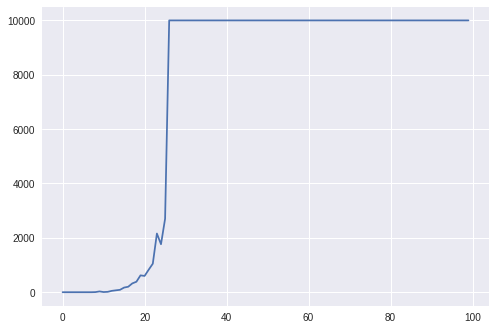

In [0]:
import numpy as np
final_density=[]
for p in np.linspace(0,1,100):
    print("sim")
    initialize()
    for step in range(200):
        update()
    final_density.append(sum(sum(config)))
matplotlib.pyplot.plot(range(len(final_density)),final_density)

for index,value in enumerate(final_density):
    if value==n**2:
        print((index-1)*0.01)
        break
        
matplotlib.pyplot.plot(range(len(final_density)),final_density)